# Universidad Nacional de Chimborazo

**Facultad:** Facultad de Ingeniería  
**Carrera:** Ciencia de Datos e IA  
**Materia:** Modelamiento  
**Docente:** Estalin Mejia H.  
**Semestre:** Tercero

---

## Trabajo Autónomo 3

### Analisis de Clasificación con Aprendizaje Supervisado: Predicción de Arrestos en Crímenes de Chicago

**Autores:**  
- Alisson Atupaña
- Mario Camacho
- Lenin Lopez

**Fecha:** 12 - 11 - 2025

**Riobamba - Ecuador**

---
**Descargar el dataset:** https://drive.google.com/file/d/1VP9iR1ScdQVeH7gJRVXq6E-Z_qOEiNhc/view

#
<div style="display:flex; align-items:flex-start; gap:14px; background:linear-gradient(90deg,#1e3a8a,#3b82f6); padding:20px; border-radius:12px; box-shadow:0 8px 20px rgba(30,58,138,0.25); color:#fff; max-width:fit-content; width:min(900px,100%); margin:16px auto; box-sizing:border-box;">
    <div style="width:40px; height:40px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.1); border-radius:8px; font-size:1.8rem; line-height:1;">📋</div>
    <div>
        <div style="font-weight:900; font-size:1.8rem; letter-spacing:0.5px;">1. Introducción y Contexto del Problema</div>
        <div style="opacity:0.9; font-size:0.95rem; margin-top:6px;">
            <strong>Objetivo:</strong> Desarrollar un random forest con el objetivo de predecir si un crimen resulta en arresto o no.<br><br>
            <strong>Dataset:</strong> Conjunto de datos que refleja los incidentes delictivos denunciados que ocurrieron en la ciudad de Chicago desde el 2001 hasta la actualidad. Cada registro incluye detalles como el tipo de crimen, la ubicación, la fecha y hora, y si el incidente resultó en un arresto.<br><br>
        </div>
    </div>
</div>

##
<div style="display:flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#ea580c,#f97316); padding:16px; border-radius:10px; box-shadow:0 6px 15px rgba(234,88,12,0.2); color:#fff; max-width:fit-content; width:min(850px,100%); margin:12px auto; margin-left:40px; box-sizing:border-box;">
    <div style="width:32px; height:32px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:6px; font-size:1.45rem; line-height:1;">📦</div>
    <div>
        <div style="font-weight:800; font-size:1.35rem; letter-spacing:0.3px;">Instalación de Librerías</div>
    </div>
</div>

###
<div style="display:flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#ca8a04,#eab308); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(202,138,4,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">⚠️</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Advertencia:</div>
        <div style="opacity:0.85; font-size:0.8rem; margin-top:2px;">Las librerías solo se deben instalar la primera vez. Comentar esta celda después de la instalación.</div>
    </div>
</div>

In [1]:
install.packages(c("readr", "dplyr", "ggplot2", "caret", "ROSE", "lightgbm", 
                   "arrow", "rpart", "rpart.plot", "randomForest", "pROC", 
                   "gridExtra", "corrplot", "lubridate", "scales", "tidyr"), 
                 verbose = FALSE, quiet = TRUE)

package 'readr' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked
package 'ROSE' successfully unpacked and MD5 sums checked
package 'lightgbm' successfully unpacked and MD5 sums checked
package 'arrow' successfully unpacked and MD5 sums checked
package 'rpart' successfully unpacked and MD5 sums checked
package 'rpart.plot' successfully unpacked and MD5 sums checked
package 'randomForest' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'corrplot' successfully unpacked and MD5 sums checked
package 'lubridate' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked
package 'tidyr' successfully unpacked and MD5 sums checked


##
<div style="display:flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#ea580c,#f97316); padding:16px; border-radius:10px; box-shadow:0 6px 15px rgba(234,88,12,0.2); color:#fff; max-width:fit-content; width:min(850px,100%); margin:12px auto; margin-left:40px; box-sizing:border-box;">
    <div style="width:32px; height:32px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:6px; font-size:1.45rem; line-height:1;">📚</div>
    <div>
        <div style="font-weight:800; font-size:1.35rem; letter-spacing:0.3px;">Carga de Librerías</div>
    </div>
</div>

In [2]:
library(dplyr)       
library(tidyr)      
library(ggplot2)     
library(caret)        
library(ROSE)       
library(lightgbm)     
library(arrow)       
library(rpart)     
library(rpart.plot)  
library(randomForest)
library(pROC)        
library(gridExtra)   
library(corrplot)   
library(lubridate)    
library(scales)

Warning message:
"package 'dplyr' was built under R version 4.5.2"

Adjuntando el paquete: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under R version 4.5.2"
Warning message:
"package 'ggplot2' was built under R version 4.5.2"
Warning message:
"package 'caret' was built under R version 4.5.2"
Cargando paquete requerido: lattice

Warning message:
"package 'ROSE' was built under R version 4.5.2"
Loaded ROSE 0.0-4


Warning message:
"package 'lightgbm' was built under R version 4.5.2"
Warning message:
"package 'arrow' was built under R version 4.5.2"

Adjuntando el paquete: 'arrow'


The following object is masked from 'package:utils':

    timestamp


Warning message:
"package 'rpart' was built under R version 4.5.2"
Warning message:
"package 'rpart.plot' was built under R version 4.5.2"
Warning message:
"pack

#
<div style="display:flex; align-items:flex-start; gap:14px; background:linear-gradient(90deg,#1e3a8a,#3b82f6); padding:20px; border-radius:12px; box-shadow:0 8px 20px rgba(34, 47, 8, 0.79); color:#fff; max-width:fit-content; width:min(900px,100%); margin:16px auto; box-sizing:border-box;">
    <div style="width:40px; height:40px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.1); border-radius:8px; font-size:1.8rem; line-height:1;">📥</div>
    <div>
        <div style="font-weight:900; font-size:1.8rem; letter-spacing:0.5px;">2. Carga y Exploración Inicial de Datos</div>
        <div style="opacity:0.9; font-size:0.95rem; margin-top:6px;">Se cargara el dataset desde el archivo parquet y se realizara una exploracion inicial de los datos, se debe entender su estructura, dimensiones, tipos de datos y caracteristicas principales.</div>
    </div>
</div>

In [3]:
datos <- read_parquet("crimes.parquet")

In [4]:
# Mostrar las primeras filas del dataset
# una primera exploración visual de los datos
head(datos)

ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,⋯,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
14005294,JJ460729,10/22/2025 12:00:00 AM,064XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,TRUE,TRUE,⋯,20,69,08B,1180026,1862452,2025,10/29/2025 03:44:51 PM,41.77784,-87.61557,"(41.777838294, -87.615566126)"
14006278,JJ460870,10/22/2025 12:00:00 AM,100XX W OHARE ST,0560,ASSAULT,SIMPLE,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,FALSE,FALSE,⋯,41,76,08A,1100658,1934241,2025,10/29/2025 03:44:51 PM,41.97629,-87.90523,"(41.976290414, -87.905227221)"
14006122,JJ461652,10/22/2025 12:00:00 AM,079XX S AVALON AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY",STREET,TRUE,FALSE,⋯,8,45,08B,1185921,1852701,2025,10/29/2025 03:44:51 PM,41.75094,-87.59426,"(41.750943595, -87.594262333)"
14008231,JJ464311,10/22/2025 12:00:00 AM,026XX W MEDILL AVE,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,FALSE,FALSE,⋯,1,22,07,1158161,1915502,2025,10/29/2025 03:44:51 PM,41.92389,-87.69428,"(41.923886122, -87.694276624)"
14005881,JJ461549,10/22/2025 12:00:00 AM,061XX W GRAND AVE,0610,BURGLARY,FORCIBLE ENTRY,SMALL RETAIL STORE,FALSE,FALSE,⋯,36,19,05,1134882,1914411,2025,10/29/2025 03:44:51 PM,41.92134,-87.77984,"(41.921336496, -87.779839808)"
14005904,JJ461412,10/22/2025 12:00:00 AM,037XX W DOUGLAS BLVD,1812,NARCOTICS,POSSESS - CANNABIS MORE THAN 30 GRAMS,STREET,TRUE,FALSE,⋯,24,29,18,1151846,1893202,2025,10/29/2025 03:44:51 PM,41.86282,-87.71807,"(41.862819475, -87.718068099)"


In [5]:
# estructura de los tipos de datos
glimpse(datos, width = 70)

Rows: 8,431,416
Columns: 22
$ ID                     <dbl> 14005294, 14006278, 14006122, 1400823…
$ `Case Number`          <chr> "JJ460729", "JJ460870", "JJ461652", "…
$ Date                   <chr> "10/22/2025 12:00:00 AM", "10/22/2025…
$ Block                  <chr> "064XX S DR MARTIN LUTHER KING JR DR"…
$ IUCR                   <chr> "0486", "0560", "0454", "0920", "0610…
$ `Primary Type`         <chr> "BATTERY", "ASSAULT", "BATTERY", "MOT…
$ Description            <chr> "DOMESTIC BATTERY SIMPLE", "SIMPLE", …
$ `Location Description` <chr> "APARTMENT", "AIRPORT TERMINAL LOWER …
$ Arrest                 <lgl> TRUE, FALSE, TRUE, FALSE, FALSE, TRUE…
$ Domestic               <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FAL…
$ Beat                   <chr> "0312", "1651", "0411", "1431", "2512…
$ District               <chr> "003", "016", "004", "014", "025", "0…
$ Ward                   <dbl> 20, 41, 8, 1, 36, 24, 18, 17, 2, 24, …
$ `Community Area`       <dbl> 69, 76, 45, 22, 19, 29, 70, 71,

In [6]:
summary(datos)

       ID           Case Number            Date              Block          
 Min.   :     634   Length:8431416     Length:8431416     Length:8431416    
 1st Qu.: 4067418   Class :character   Class :character   Class :character  
 Median : 7520809   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 7522660                                                           
 3rd Qu.:10919350                                                           
 Max.   :14012589                                                           
                                                                            
     IUCR           Primary Type       Description        Location Description
 Length:8431416     Length:8431416     Length:8431416     Length:8431416      
 Class :character   Class :character   Class :character   Class :character    
 Mode  :character   Mode  :character   Mode  :character   Mode  :character    
                                                                    

##
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(202, 223, 45, 1); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:40px; height:40px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.1); border-radius:8px; font-size:1.8rem; line-height:1;">📋</div>
    <div>
        <div style="font-weight:900; font-size:1.8rem; letter-spacing:0.5px; color:#000">Información de los datos y de las columnas</div>
        
</div>

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>Arrest:</strong> Indica si hubo arresto o no, basicamente es la variable objetivo porque es la variable que necesitamos predecir</li>
            </ul>
</div>

In [7]:
# cambiar el nombre de la columna
datos <- datos %>% rename(arresto = Arrest)

head(datos$arresto, 20)
table(datos$arresto)

# se puede notar un desbalance muy grande, se intentara balancear despues del preprocesamiento

[1]  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE
[13] FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE


  FALSE    TRUE 
6305022 2126394 

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>ID:</strong> Un identificador del registro, no tiene ningun  valor predictivo y se eliminara</li>
                <li><strong>Case Number:</strong> Identificador del numero de caso, no tiene valor predictivo y se eliminara</li>
            </ul>
</div>

In [8]:
datos$ID <- NULL
datos$`Case Number` <- NULL

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>Date:</strong> Fecha y hora estimada del detito, se puede encontrar patrones sobre la hora del dia, dia de la semana, mes o temporada, segun el tipo de delito</li>
            </ul>
</div>

In [9]:
# cambiar el nombre de la columna
datos <- datos %>% rename(fecha = Date)

head(datos$fecha, 10)

[1] "10/22/2025 12:00:00 AM" "10/22/2025 12:00:00 AM" "10/22/2025 12:00:00 AM"
 [4] "10/22/2025 12:00:00 AM" "10/22/2025 12:00:00 AM" "10/22/2025 12:00:00 AM"
 [7] "10/22/2025 12:00:00 AM" "10/22/2025 12:00:00 AM" "10/22/2025 12:00:00 AM"
[10] "10/22/2025 12:00:00 AM"

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>Block:</strong> Es la direccion del crimen, y esta parcialmente sensurada, es demasiada redundante. serviria para NPL pero para este caso sera inutil</li>
            </ul>
</div>

In [10]:
# cambiar el nombre de la columna
datos <- datos %>% rename(bloque = Block)

head(datos$bloque, 10)

[1] "064XX S DR MARTIN LUTHER KING JR DR" "100XX W OHARE ST"                   
 [3] "079XX S AVALON AVE"                  "026XX W MEDILL AVE"                 
 [5] "061XX W GRAND AVE"                   "037XX W DOUGLAS BLVD"               
 [7] "082XX S WASHTENAW AVE"               "085XX S RACINE AVE"                 
 [9] "008XX W BLACKHAWK ST"                "006XX S CENTRAL PARK AVE"

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>IUCR:</strong> Codigo del tipo del crimen, sera util para categorizar los diferentes tipos de delitos, pero se eliminara porque la variable "Primary type" aporta mejores datos categoricos y habra menos riesgo de sobreajuste</li>
            </ul>
</div>

In [11]:
head(datos$IUCR, 30)

[1] "0486" "0560" "0454" "0920" "0610" "1812" "0810" "1320" "1310" "0820"
[11] "1345" "0486" "0810" "0460" "1822" "1310" "0810" "2020" "1310" "0497"
[21] "0810" "5111" "0479" "1130" "0910" "0460" "0486" "1153" "0820" "0560"

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>Primary Type:</strong> Descripcion del IUCR, es el nombre del crimen, permite mejor categorizacion de los tipos de crimenes, sera muy util por lo que se mantendra</li>
            </ul>
</div>

In [12]:
# cambiar el nombre de la columna
datos <- datos %>% rename(tipo = `Primary Type`)

head(datos$tipo, 20)

[1] "BATTERY"             "ASSAULT"             "BATTERY"            
 [4] "MOTOR VEHICLE THEFT" "BURGLARY"            "NARCOTICS"          
 [7] "THEFT"               "CRIMINAL DAMAGE"     "CRIMINAL DAMAGE"    
[10] "THEFT"               "CRIMINAL DAMAGE"     "BATTERY"            
[13] "THEFT"               "BATTERY"             "NARCOTICS"          
[16] "CRIMINAL DAMAGE"     "THEFT"               "NARCOTICS"          
[19] "CRIMINAL DAMAGE"     "BATTERY"

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>Description:</strong> Descripcion detallada del crimen, no sera util para este modelado porque el random forest no maneja texto, pero puede ser util para analisis cualitativo o NLP. no se obtendra nada de esta variable</li>
            </ul>
</div>

In [13]:
# cambiar el nombre de la columna
datos <- datos %>% rename(descripcion = Description)

head(datos$descripcion, 10)

[1] "DOMESTIC BATTERY SIMPLE"                                
 [2] "SIMPLE"                                                 
 [3] "AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY"
 [4] "ATTEMPT - AUTOMOBILE"                                   
 [5] "FORCIBLE ENTRY"                                         
 [6] "POSSESS - CANNABIS MORE THAN 30 GRAMS"                  
 [7] "OVER $500"                                              
 [8] "TO VEHICLE"                                             
 [9] "TO PROPERTY"                                            
[10] "$500 AND UNDER"

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>Location Description:</strong> Descripción del tipo de lugar que ocurrio el delito, util para entender el contexto del crimen, ayudara al modelo a predecir, ademas ofrece muchas categorias que pueden contener datos utiles para predecir</li>
            </ul>
</div>

In [14]:
# cambiar el nombre de la columna
datos <- datos %>% rename(lugar = `Location Description`)

head(datos$lugar, 20)

[1] "APARTMENT"                                 
 [2] "AIRPORT TERMINAL LOWER LEVEL - SECURE AREA"
 [3] "STREET"                                    
 [4] "STREET"                                    
 [5] "SMALL RETAIL STORE"                        
 [6] "STREET"                                    
 [7] "RESIDENCE"                                 
 [8] "STREET"                                    
 [9] "APARTMENT"                                 
[10] "STREET"                                    
[11] "CTA TRAIN"                                 
[12] "RESIDENCE"                                 
[13] "APARTMENT"                                 
[14] "RESIDENCE"                                 
[15] "STREET"                                    
[16] "APARTMENT"                                 
[17] "VEHICLE - COMMERCIAL"                      
[18] "STREET"                                    
[19] "APARTMENT"                                 
[20] "APARTMENT"

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>Domestic:</strong> Indica si el crimen fue doméstico, sera util para el modelo porque los crimenes domesticos tendran mas tasas de denuncias. seguramente podria ayudar a identificar patrones en los datos</li>
            </ul>
</div>

In [15]:
# cambiar el nombre de la columna
datos <- datos %>% rename(domestico = Domestic)

head(datos$domestico, 20)
table(datos$domestico)

[1]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
[13]  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE


  FALSE    TRUE 
6975972 1455444 

In [16]:
# los crimenes NO domesticos tienen mayor tasa de arresto (26.5%) que los domesticos (19.2%)
prop.table(table(datos$domestico, datos$arresto), 1) * 100

       
           FALSE     TRUE
  FALSE 73.53305 26.46695
  TRUE  80.75728 19.24272

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>Beat:</strong> Area geográfica asignada a un unidad de policía. Se tienen dudas de si se elimina o no, porque puede tener informacion de patrones de crimenes segun la ubicacion, pero puede ser muy redundante porque la variable district ya captura esta informacion, ademas tiene muchas categorias porque lo que hay riesgo de sobreajuste. se eliminara</li>
            </ul>
</div>

In [17]:
# cambiar el nombre de la columna
datos <- datos %>% rename(unidad_policial = `Beat`)

head(datos$unidad_policial, 30)

[1] "0312" "1651" "0411" "1431" "2512" "1011" "0835" "0613" "1822" "1133"
[11] "0915" "1012" "1512" "0524" "0413" "1132" "1411" "0924" "1532" "0726"
[21] "0734" "1014" "1522" "0912" "0215" "0623" "0533" "2211" "2232" "1135"

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>District:</strong> Distrito policial, aporta informacion mas generalizada que Beat con pocas categorias por lo tanto no tendra sobreajuste. sera util para saber el patron de los crimenes</li>  
            </ul>
</div>

In [18]:
# cambiar el nombre de la columna
datos <- datos %>% rename(distrito = District)

head(datos$distrito, 20)

[1] "003" "016" "004" "014" "025" "010" "008" "006" "018" "011" "009" "010"
[13] "015" "005" "004" "011" "014" "009" "015" "007"

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>Ward:</strong> es el distrito del ayuntamiento donde ocurrio el incidente. contiene informacion demografica que ya la tenermos en la variable District, por lo que seria muy redundante. se eliminara</li>
                <li><strong>Community Area:</strong> Areas comunitarias de Chicago donde ocurrio el delito, lo mismo que la variable anterior. se eliminara</li>
            </ul>
</div>

In [19]:
# cambiar el nombre de la columna
datos <- datos %>% rename(ward = Ward)

head(datos$ward, 20)

[1] 20 41  8  1 36 24 18 17  2 24 11 24 29 21  7 24  1 15 28 17

In [20]:
# cambiar el nombre de la columna
datos <- datos %>% rename(community_area = `Community Area`)

head(datos$community_area, 20)

[1] 69 76 45 22 19 29 70 71  8 27 34 29 25 53 48 29 22 61 25 67

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>FBI Code:</strong> Indica la clasificación del delito segun lo descrito en el Sistema Nacional de Informes Basados en Incidentes (NIBRS) del FBI, no aporta nigun dato nuevo. sera muy redundante con Primary Type. se eliminara</li>
            </ul>
</div>

In [21]:
# cambiar el nombre de la columna
datos <- datos %>% rename(fbi_code = `FBI Code`)

head(datos$fbi_code, 20)

[1] "08B" "08A" "08B" "07"  "05"  "18"  "06"  "14"  "14"  "06"  "14"  "08B"
[13] "06"  "08B" "18"  "14"  "06"  "18"  "14"  "04B"

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>X Coordinate / Y Coordinate:</strong> Coordenadas de la ubicación donde ocurrió el incidente en la proyección State Plane Illinois East NAD 1983, es redundante con Latitude / Longitude. por lo que se eliminara</li>
            </ul>
</div>

In [22]:
# cambiar el nombre de la columna
datos <- datos %>% rename(coordenada_x = `X Coordinate`)

head(datos$coordenada_x, 20)


#cambiar el nombre de la columna
datos <- datos %>% rename(coordenada_y = `Y Coordinate`)
head(datos$coordenada_y, 20)

[1] 1180026 1100658 1185921 1158161 1134882 1151846 1159805 1169815 1170199
[10]      NA 1175739 1146973 1137136 1173449 1193360 1148236 1155571 1164447
[19] 1143683 1164868

[1] 1862452 1934241 1852701 1915502 1914411 1893202 1849965 1848104 1910003
[10]      NA 1881773 1892034 1900523 1826400 1843756 1895030 1918136 1874620
[19] 1900776 1859285

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>Year:</strong> Año del delito, muy util para estimar las tendencias temporales del arresto. pero redundante porque la variable date ya contiene esta informacion, se eliminara</li>
            </ul>
</div>

In [23]:
#cambiar el nombre de la columna
datos <- datos %>% rename(year = Year)

head(datos$year, 20)

[1] 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025
[16] 2025 2025 2025 2025 2025

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>Updated On:</strong> Fecha de la ultima actualizacion del registro, solo una fecha administrativa y no tiene nada de relacion con el crimen. al no tener valor predictivo se elimina</li>
            </ul>
</div>

In [24]:
#cambiar el nombre de la columna
datos <- datos %>% rename(updated_on = `Updated On`)

head(datos$updated_on, 20)

[1] "10/29/2025 03:44:51 PM" "10/29/2025 03:44:51 PM" "10/29/2025 03:44:51 PM"
 [4] "10/29/2025 03:44:51 PM" "10/29/2025 03:44:51 PM" "10/29/2025 03:44:51 PM"
 [7] "10/29/2025 03:44:51 PM" "10/29/2025 03:44:51 PM" "10/29/2025 03:44:51 PM"
[10] "10/29/2025 03:44:51 PM" "10/29/2025 03:44:51 PM" "10/29/2025 03:44:51 PM"
[13] "10/29/2025 03:44:51 PM" "10/29/2025 03:44:51 PM" "10/29/2025 03:44:51 PM"
[16] "10/29/2025 03:44:51 PM" "10/29/2025 03:44:51 PM" "10/29/2025 03:44:51 PM"
[19] "10/29/2025 03:44:51 PM" "10/29/2025 03:44:51 PM"

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                 <li><strong>Latitude / Longitude:</strong> Coordenadas geográficas exactas del suceso. Permiten un análisis geoespacial además de que el modelo puede puede aprender patrones delictivos segun la ubicacion</li>
            </ul>
</div>

In [25]:
head(datos$Longitude, 20)
# renombrar columna
datos <- datos %>% rename(Longitud = Longitude)

head(datos$Latitude, 20)
# renombrar columna
datos <- datos %>% rename(Latitud = Latitude)

[1] -87.61557 -87.90523 -87.59426 -87.69428 -87.77984 -87.71807 -87.69004
 [8] -87.65342 -87.65021        NA -87.63070 -87.73599 -87.77189 -87.64074
[15] -87.56729 -87.73127 -87.70372 -87.67234 -87.74784 -87.67123

[1] 41.77784 41.97629 41.75094 41.92389 41.92134 41.86282 41.74401 41.73869
 [9] 41.90854       NA 41.83095 41.85971 41.88319 41.67905 41.72622 41.86791
[17] 41.93117 41.81157 41.88376 41.76948

<div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li><strong>Location:</strong> combinación de latitud y longitud de forma textual, muy irrelevante para el analisis ya que dichas coordenadas se tienen en variables independientes. se elimina</li>
            </ul>
        </div>

In [26]:
# cambiar el nombre de la columna
datos <- datos %>% rename(localizacion = `Location`)

head(datos$localizacion, 20)

[1] "(41.777838294, -87.615566126)" "(41.976290414, -87.905227221)"
 [3] "(41.750943595, -87.594262333)" "(41.923886122, -87.694276624)"
 [5] "(41.921336496, -87.779839808)" "(41.862819475, -87.718068099)"
 [7] "(41.744011334, -87.690039293)" "(41.738693288, -87.653415499)"
 [9] "(41.908541875, -87.650205438)" NA                             
[11] "(41.830954079, -87.630703226)" "(41.859708775, -87.735986352)"
[13] "(41.883185894, -87.771891885)" "(41.679054768, -87.640740879)"
[15] "(41.726219145, -87.567294437)" "(41.867905958, -87.731273072)"
[17] "(41.931166593, -87.703722261)" "(41.811571424, -87.672336092)"
[19] "(41.883760105, -87.747844263)" "(41.76948137, -87.671225068)"

#
<div style="display:flex; align-items:flex-start; gap:14px; background:linear-gradient(90deg,#1e3a8a,#3b82f6); padding:20px; border-radius:12px; box-shadow:0 8px 20px rgba(30,58,138,0.25); color:#fff; max-width:fit-content; width:min(900px,100%); margin:16px auto; box-sizing:border-box;">
    <div style="width:40px; height:40px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.1); border-radius:8px; font-size:1.8rem; line-height:1;">🧹</div>
    <div>
        <div style="font-weight:900; font-size:1.8rem; letter-spacing:0.5px;">3. Preprocesamiento y Limpieza de Datos</div>
        <div style="opacity:0.9; font-size:0.95rem; margin-top:6px;">Limpieza de datos, selección de variables relevantes, feature engineering y detección de outliers.</div>
    </div>
</div>

##
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#ea580c,#f97316); padding:16px; border-radius:10px; box-shadow:0 6px 15px rgba(234,88,12,0.2); color:#fff; max-width:fit-content; width:min(850px,100%); margin:12px auto; margin-left:40px; box-sizing:border-box;">
    <div style="width:32px; height:32px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:6px; font-size:1.45rem; line-height:1;">🔍</div>
    <div>
        <div style="font-weight:800; font-size:1.35rem; letter-spacing:0.3px;">Deteccion de outliers</div>
    </div>
</div>

###
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#7c3aed,#a855f7); padding:14px; border-radius:8px; box-shadow:0 4px 12px rgba(124,58,237,0.15); color:#fff; max-width:fit-content; width:min(800px,100%); margin:10px auto; margin-left:80px; box-sizing:border-box;">
    <div style="width:28px; height:28px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:6px; font-size:1.2rem; line-height:1;">⚙️</div>
    <div>
        <div style="font-weight:700; font-size:1.15rem;">Analisis de la variable Date(fecha)</div>
    </div>
</div>

In [27]:
# Extraer características temporales de la columna Date
datos <- datos %>%
  mutate(
    fecha_extrac = mdy_hms(fecha), # convertir a formato fecha y hora
    hora = hour(fecha_extrac), # extraer la hora
    dia = wday(fecha_extrac, week_start = 1), # extraer el día de la semana (1=Lunes, 7=Domingo)
    mes = month(fecha_extrac), # extraer el mes
    año = year(fecha_extrac), # extraer el año
    finde = ifelse(dia %in% c(6, 7), 1, 0), # indicador de fin de semana
    denoche = ifelse(hora >= 20 | hora <= 6, 1, 0) # indicador de noche
  ) %>%
  select(-fecha, -fecha_extrac)  # Eliminar columnas de fecha originales

glimpse(datos)

Rows: 8,431,416
Columns: 25
$ bloque          <chr> "064XX S DR MARTIN LUTHER KING JR DR", "100XX W OHARE …
$ IUCR            <chr> "0486", "0560", "0454", "0920", "0610", "1812", "0810"…
$ tipo            <chr> "BATTERY", "ASSAULT", "BATTERY", "MOTOR VEHICLE THEFT"…
$ descripcion     <chr> "DOMESTIC BATTERY SIMPLE", "SIMPLE", "AGGRAVATED P.O. …
$ lugar           <chr> "APARTMENT", "AIRPORT TERMINAL LOWER LEVEL - SECURE AR…
$ arresto         <lgl> TRUE, FALSE, TRUE, FALSE, FALSE, TRUE, FALSE, FALSE, T…
$ domestico       <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ unidad_policial <chr> "0312", "1651", "0411", "1431", "2512", "1011", "0835"…
$ distrito        <chr> "003", "016", "004", "014", "025", "010", "008", "006"…
$ ward            <dbl> 20, 41, 8, 1, 36, 24, 18, 17, 2, 24, 11, 24, 29, 21, 7…
$ community_area  <dbl> 69, 76, 45, 22, 19, 29, 70, 71, 8, 27, 34, 29, 25, 53,…
$ fbi_code        <chr> "08B", "08A", "08B", "07", "05", "18", "06", "14", "14…
$ coordenada

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Correlacion entre hora y arresto</div>
    </div>
</div>

In [28]:
tasa_hora <- datos %>%
  group_by(hora) %>%
  summarise(tasa_arresto = mean(arresto) * 100)

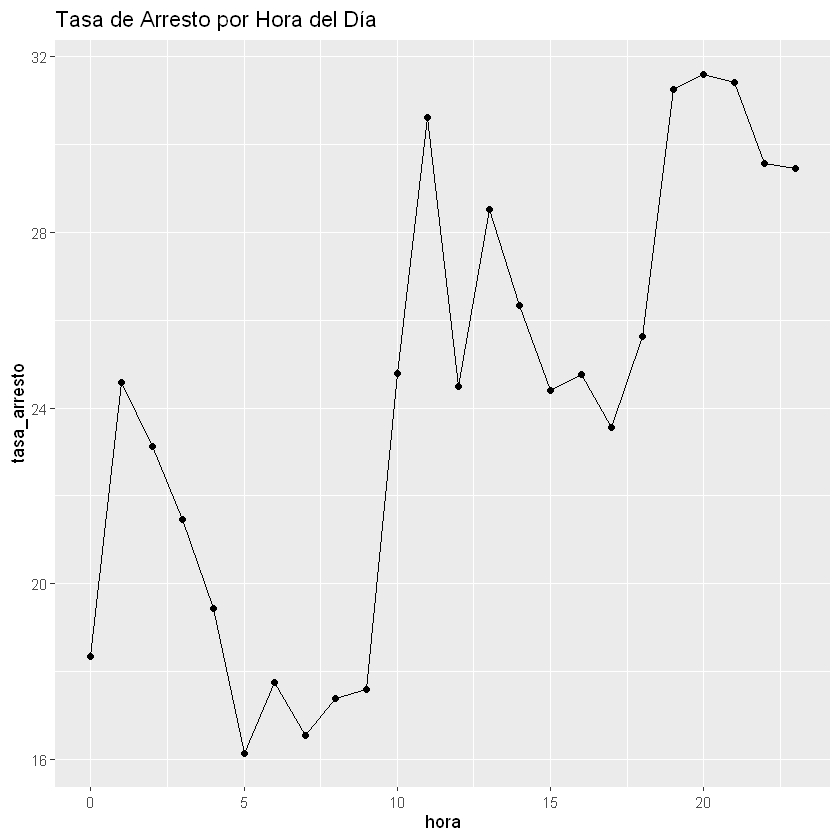

In [29]:
ggplot(tasa_hora, aes(x = hora, y = tasa_arresto)) +
  geom_line() +
  geom_point() +
  labs(title = "Tasa de Arresto por Hora del Día")

el grafico muestra una evolucion de la probabilidad de arresto a lo largo de las 24 horas del dia, las horas de madrugada (4 a 6 de la mañana) presenta una tasa baja de arresto, posiblemente a una menor presencia policial y tambien una menor actividad criminal. En constraste, las horas picos ocurren en al mediodia aprimadamente a las 11 de la mañana, y en horas tampranas de la noche (19 a 21 hrs), que coincide con una mayor actividad policial y patrullaje. Durante la madrugada (0 a 6 am) se observa una disminucion progresiva en la tasa de arresto, hasta un punto minimo en las primeras horas del dia. Y finalmente, a partir de las 19 hrs, la tasa de arresto comienza a aumentar significativamente que se mantienen elevadas en la noche,posiblemente por la mayor efectividad policial en esas horas. Esto indica que la hora del día tiene influencia en la probabilidad de arresto, justificando su inclusión como predictor

In [60]:
# Convertir arresto a 0/1
datos_cor <- datos %>%
  mutate(arresto_num = as.numeric(arresto))

# Test de correlación
cor.test(datos_cor$hora, datos_cor$arresto_num)


	Pearson's product-moment correlation

data:  datos_cor$hora and datos_cor$arresto_num
t = 236.91, df = 8431414, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08064753 0.08198858
sample estimates:
       cor 
0.08131809 


El test de correlacion de Pearson entre Hora y Arresto arroja un coeficiente de r=0.0813 con un p-valor < 2.2e-16, esto indica una correlacion positiva que es estadisticamente significativa entre ambas variables
aunque el coeficiente de correlacion es muy bajo, el p-valor es practicamente cero ademas de una tamaño muestral de 8.4 millones de registros, por lo tanto la relacion observada es estadisticamente real. combinado con el grafico que revela un comportamiento no lineal con muchos picos y valles, que no son captados por la correlacion de Pearson, se concluye que la variable hora tiene una relacion estadisticamente significativa con la variable arresto, por lo que se justifica su inclusion como predictor en el modelo de random forest

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Correlacion entre dia y arresto</div>
    </div>
</div>

la variable dia se convertirá a factor por diferentes motivos:
- dia tiene valores de 1 al 7, pero no son numeros, son etiquetas categoricas que representan dias de la semana
el modelo tendra problemas si se lo deja asi, porque el modelo pensara que 7 es mayor que 1 por lo que intentara encontrar una relacion matematica entre los dias, por lo que eso no tiene sentido
- al convertirlo a factor, el modelo tratara cada dia comoo una categoria unica por lo que no asumira relaciones matematicas entre ellos
- se necesita que el modelo aprenda patrones especificos de cada uno de los dias, por ejemplo, los fines de semana pueden tener tasas de arresto diferentes a los dias laborales
- ademas se usara level=1:7 para definir el orden correcto de los dias de la semana

In [30]:
# etiquetar los dias de la semana
datos <- datos %>%
  mutate(dia = factor(dia, levels = 1:7,
                      labels = c("Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo")))

cat("Clase de dia:", class(datos$dia), "\n")
cat("Niveles:", levels(datos$dia), "\n")

Clase de dia: factor 
Niveles: Lunes Martes Miércoles Jueves Viernes Sábado Domingo 


In [35]:
# calcular la tasa de arresto por dia de la semana
tasa_dia <- datos %>%
  group_by(dia) %>%
  summarise(tasa_arresto = mean(arresto) * 100)

tasa_dia

dia,tasa_arresto
<fct>,<dbl>
Lunes,24.36674
Martes,25.89142
Miércoles,26.02020
Jueves,25.91179
Viernes,25.16954
Sábado,24.86784
Domingo,24.26427


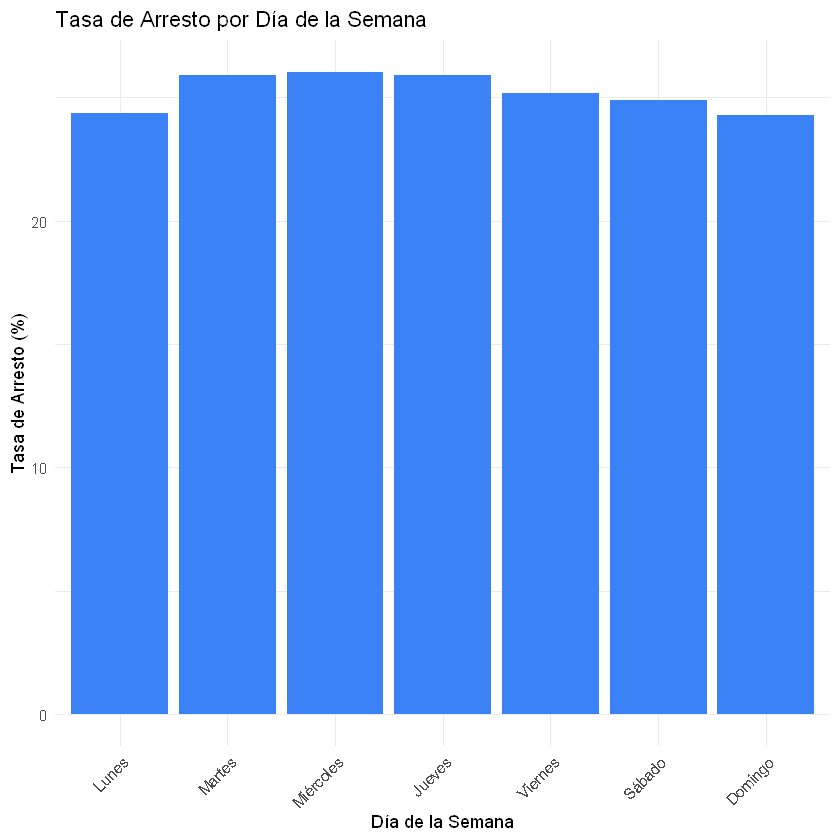

In [33]:
ggplot(tasa_dia, aes(x = dia, y = tasa_arresto)) +
  geom_col(fill = "#3b82f6") +
  labs(title = "Tasa de Arresto por Día de la Semana",
       x = "Día de la Semana",
       y = "Tasa de Arresto (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

El gráfico de barras revela un patrón interesante en la tasa de arresto según el día de la semana. Los días laborales de mitad de semana (martes, miércoles y jueves) presentan las tasas de arresto más altas, alcanzando valores entre 25.9% y 26.0%. En contraste, el lunes y domingo muestran las tasas más bajas, aproximadamente 24.3-24.4%.

Este comportamiento puede explicarse por varios factores: durante la mitad de semana existe mayor presencia policial y actividad comercial, lo que incrementa las oportunidades de detección y arresto. El lunes, posiblemente debido al inicio de la semana laboral, tiene una tasa de arresto menor (24.37%). El domingo presenta la tasa más baja (24.26%), lo cual podría relacionarse con menor actividad general y posiblemente menor personal policial en servicio.

La variación entre el día con menor tasa de arresto (domingo: 24.26%) y el día con mayor tasa (miércoles: 26.02%) es de aproximadamente 1.76 puntos porcentuales, lo que representa una diferencia relativa del 7.3%. Aunque esta diferencia puede parecer pequeña, con un dataset de 8.4 millones de registros, esta variación es estadísticamente significativa y relevante para el modelo predictivo.

In [ ]:
# tabla de contingencia
tabla_dia <- table(datos$dia, datos$arresto)
tabla_dia

           
             FALSE   TRUE
  Lunes     902264 290682
  Martes    892205 311711
  Miércoles 895828 315081
  Jueves    888351 310694
  Viernes   946074 318216
  Sábado    908453 300687
  Domingo   871847 279323

In [ ]:
# Test Chi-Cuadrado
chi_test_dia <- chisq.test(tabla_dia)
print(chi_test_dia)

# Calcular Cramér's V (medida de asociación)
# Cramér's V varía entre 0 (sin asociación) y 1 (asociación perfecta)
cramer_v <- sqrt(chi_test_dia$statistic / (sum(tabla_dia) * (min(dim(tabla_dia)) - 1)))
cat("\nCramér's V:", cramer_v, "\n")


	Pearson's Chi-squared test

data:  tabla_dia
X-squared = 2102.5, df = 6, p-value < 2.2e-16


Cramér's V: 0.0157912 


El test chi-cuadrado entre el dia y el arresto da un estadistico de x^2 = 2102.5 con 6 grados de libertad y un p-valor < 2.2e-16, indica una asociacion estadisticamente significativa entre ambas variables. el p-valor que es casi cero puede confirmar una relacion real entre estas dos variables ya que no es producto del azar

debido a la limitaciones del test chi-cuadrado para medir la magnitud de la asociacion entre variables categoricas con muestras grandes, se calcula el coeficiente de Cramér's V, que es una medida estandarizada de la fuerza de la asociacion entre variables categoricas. El coeficiente de Cramér's V se calcula como:

$$
V = \sqrt{\frac{X^2}{n(k-1)}}
$$
donde X² es el estadístico chi-cuadrado, n es el tamaño de la muestra (8.4 millones) y k es el número de categorías en la variable con menos categorías (7 dias de la semana)

El coeficiente de Cramér's V se interpreta en una escala de 0 a 1, donde 0 indica ninguna asociación y 1 indica una asociación perfecta. Generalmente es una complementacion muy buena con chi-cuadrado para entender la relacion entre variables categoricas

En este caso el coeficiente de Cramér's V da como resultado 0.0158, por lo que indica una asociacion practicamente nula entre las dos variables. Aunque tenermos que pensar que este valor es afectador por la cantidad de muestras (8.4 millones), aunque se tienen asociaciones pequeñas este valor bajo es capaz de demostrar que, aunque existe una relacion real y consistente, el dia de la semana por si solo no es un predictor dominante de arrestos.

por lo tanto a pesar que el coeficiente es muy bajo, se tiene evidencia estadistica fuerte que combinada con las diferencias que se pueden observar en el grafico, se tiene una buena justificacion para no eliminar la variable dia del modelo de random forest, porque puede aportar informacion util para predecir arrestos en conjunto con otras variables

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Correlacion entre mes y arresto</div>
    </div>
</div>

la razon de convertir mes a factor es practicamente la misma que la variable dia

In [38]:
# mes a factor con etiquetas de los meses
datos <- datos %>%
  mutate(mes = factor(mes, levels = 1:12,
                      labels = c("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
                                 "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")))

# Verificar la conversión
cat("Clase de mes:", class(datos$mes), "\n")
cat("Niveles:", levels(datos$mes), "\n")

Clase de mes: factor 
Niveles: Enero Febrero Marzo Abril Mayo Junio Julio Agosto Septiembre Octubre Noviembre Diciembre 


In [ ]:
# tasa de arresto por mes
tasa_mes <- datos %>%
  group_by(mes) %>%
  summarise(tasa_arresto = mean(arresto) * 100)

tasa_mes

mes,tasa_arresto
<fct>,<dbl>
Enero,26.98266
Febrero,28.35193
Marzo,27.01089
Abril,25.82929
Mayo,25.14666
Junio,24.13367
Julio,23.79690
Agosto,24.19910
Septiembre,24.43722


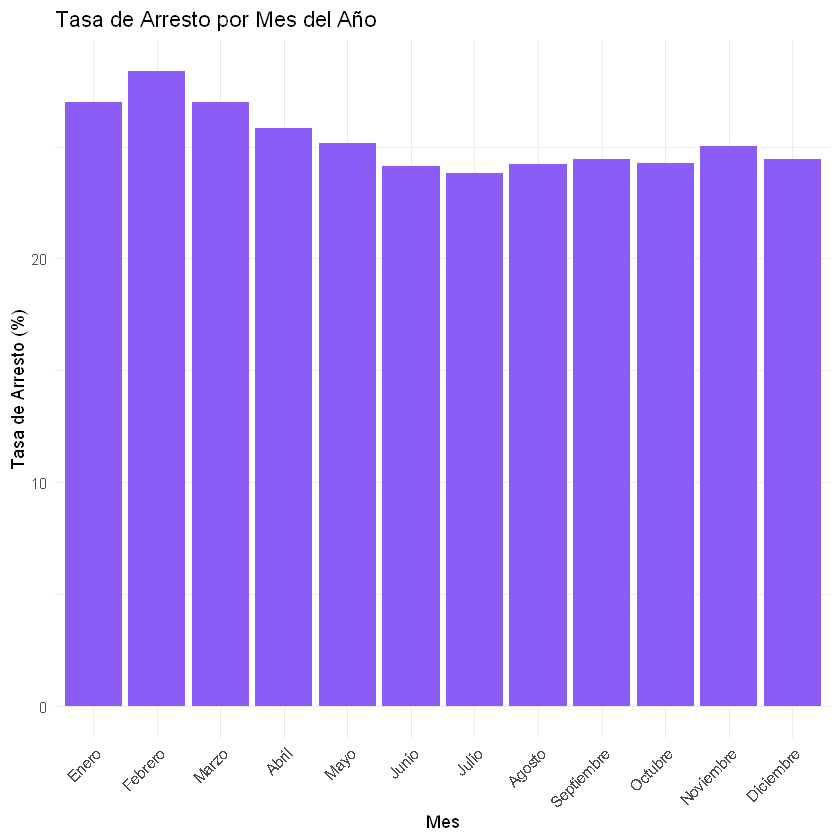

In [41]:
ggplot(tasa_mes, aes(x = mes, y = tasa_arresto)) +
  geom_col(fill = "#8b5cf6") +
  labs(title = "Tasa de Arresto por Mes del Año",
       x = "Mes",
       y = "Tasa de Arresto (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

El grafico muestra una variacion estacional en la tasa de arresto a lo largo de los años, revela que en los meses de invierno y principis de primavera (Enero, Febrero y Marzo) tienen tasas de arresto altas. Lo que va en contraste con meses de verano (Junio, Julio y Agosto) que tienen tasas bajas

Esta tendencia se explica por factores donde los meses mas frios pueden tener mayor eficacia policial en espacios cerrdos, esto se cree asi porque en verano las actividades al aire libre pueden dificultar los arrestos. Ademas, ciertos tipos de crimenes predominan en diferentes estaciones, afectando las tasas de captura
Al existir una diferencia porcentual entre el mes con una mayor tasa (Febrero: 28.35%) y el de menor tasa (Julio: 23.80%) se confirma que los meses del año si tienen influencua en como se realizan los arrestos y se justifica su inclusion como predictor en el modelo de random forest 

In [43]:
# tabla de contingencia
tabla_mes <- table(datos$mes, datos$arresto)
tabla_mes

            
              FALSE   TRUE
  Enero      482860 178435
  Febrero    418750 165704
  Marzo      504627 186746
  Abril      510514 177782
  Mayo       560522 188305
  Junio      568191 180746
  Julio      600562 187545
  Agosto     590508 188517
  Septiembre 554686 179387
  Octubre    557157 178526
  Noviembre  487480 162879
  Diciembre  469165 151822

In [44]:
# Test Chi-Cuadrado
chi_test_mes <- chisq.test(tabla_mes)
print(chi_test_mes)

# Calcular Cramér's V
cramer_v_mes <- sqrt(chi_test_mes$statistic / (sum(tabla_mes) * (min(dim(tabla_mes)) - 1)))
cat("\nCramér's V:", cramer_v_mes, "\n")


	Pearson's Chi-squared test

data:  tabla_mes
X-squared = 7987.7, df = 11, p-value < 2.2e-16


Cramér's V: 0.03077947 


El test chi-cuadrado entre el mes del año y el arresto da como estadistico X² = 7987.7 con 11 grados de libertad y con un p-valor < 2.2e-16, indica una asociacion estadiscticamente significativa entre estas dos variables

aunque el coeficiente de Cramér's V es bajo (0.0308), e indica una asociacion muy debil (<0.10), con un p-valor casi cero y un tamaño de muestra de 8.4 millones confirma la variacion estacional que pueden ser observadas y no son productos de algo azar sino patrones reales. Esto lo demuestra el grafico, con la tendencia estacional clara
se debe tomar en cuenta que el modelo de random forest sera capaz de aprovechar estos patrones para mejorar sus diferentes predicciones, aunque no tendra un gran peso por si sola, al combinarla con las demas variables temporales el modelo podra capturar las interacciones complejas. Se justifica claramente el uso de la variable mes como predictor en el modelo de random forest

##
<div style="display:flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#ea580c,#f97316); padding:16px; border-radius:10px; box-shadow:0 6px 15px rgba(234,88,12,0.2); color:#fff; max-width:fit-content; width:min(850px,100%); margin:12px auto; margin-left:40px; box-sizing:border-box;">
    <div style="width:32px; height:32px; display:flex; align-items:center; justify-content:center; background:rgba(255, 255, 255, 1); border-radius:6px; font-size:1.45rem; line-height:1;">❓</div>
    <div>
        <div style="font-weight:800; font-size:1.35rem; letter-spacing:0.3px;">Verificación de N/A</div>
    </div>
</div>

In [35]:
data.frame(Missing_Values = colSums(is.na(datos)))

,Missing_Values
,<dbl>
fecha,0
tipo,0
lugar,15062
arresto,0
domestico,0
distrito,47
Latitud,93963
Longitud,93963


<div style="display:flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#0e7490,#06b6d4); padding:16px; border-radius:10px; box-shadow:0 6px 15px rgba(14,116,144,0.2); color:#fff; max-width:fit-content; width:min(850px,100%); margin:12px auto; margin-left:40px; box-sizing:border-box;">
    <div style="width:32px; height:32px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:6px; font-size:1.45rem; line-height:1;">🧠</div>
    <div>
        <div style="font-weight:800; font-size:1.35rem; letter-spacing:0.3px;">Solo existen N/A en las variables Lugar, Longitud y Latitud. </div>
    </div>
</div>